### Phase 4: Build MLP model for forecast

In [1]:
# measure execution time
%load_ext autotime

time: 0 ns (started: 2023-06-30 18:22:28 +03:00)


In [2]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

time: 2.62 s (started: 2023-06-30 18:22:28 +03:00)


### Load the dataset

In [3]:
# read dataset
time_series = pd.read_csv('C:/Users/SK/Desktop/Diploma_Thesis/Datasets/San-Francisco-Yellow-Cabs/Files/time_series.txt',nrows=1)

# drop unecessary columns
time_series.drop(["Traj ID","Taxi ID"],axis=1,inplace=True)

# print first two rows
time_series.head(2)

,Path,Length,"(Timestamp('2008-05-18 00:00:00'), Timestamp('2008-05-18 00:30:00'))","(Timestamp('2008-05-18 00:30:00'), Timestamp('2008-05-18 01:00:00'))","(Timestamp('2008-05-18 01:00:00'), Timestamp('2008-05-18 01:30:00'))","(Timestamp('2008-05-18 01:30:00'), Timestamp('2008-05-18 02:00:00'))","(Timestamp('2008-05-18 02:00:00'), Timestamp('2008-05-18 02:30:00'))","(Timestamp('2008-05-18 02:30:00'), Timestamp('2008-05-18 03:00:00'))","(Timestamp('2008-05-18 03:00:00'), Timestamp('2008-05-18 03:30:00'))","(Timestamp('2008-05-18 03:30:00'), Timestamp('2008-05-18 04:00:00'))",...,"(Timestamp('2008-05-24 19:00:00'), Timestamp('2008-05-24 19:30:00'))","(Timestamp('2008-05-24 19:30:00'), Timestamp('2008-05-24 20:00:00'))","(Timestamp('2008-05-24 20:00:00'), Timestamp('2008-05-24 20:30:00'))","(Timestamp('2008-05-24 20:30:00'), Timestamp('2008-05-24 21:00:00'))","(Timestamp('2008-05-24 21:00:00'), Timestamp('2008-05-24 21:30:00'))","(Timestamp('2008-05-24 21:30:00'), Timestamp('2008-05-24 22:00:00'))","(Timestamp('2008-05-24 22:00:00'), Timestamp('2008-05-24 22:30:00'))","(Timestamp('2008-05-24 22:30:00'), Timestamp('2008-05-24 23:00:00'))","(Timestamp('2008-05-24 23:00:00'), Timestamp('2008-05-24 23:30:00'))","(Timestamp('2008-05-24 23:30:00'), Timestamp('2008-05-25 00:00:00'))"
0,"[60678630, 60678630]",2,0,3,1,0,1,0,0,0,...,1,0,2,0,0,1,1,0,2,1


time: 78 ms (started: 2023-06-30 18:22:30 +03:00)


In [4]:
# this list contains the column names
columns = ["Path","Length"]

# generate the columns of the dataset
i =2
while(True):
    if i == 2:
        columns.append(pd.to_datetime('2008-05-18 00:00:00'))
    else:
        columns.append(columns[i-1] + timedelta(seconds=1800))
    
    if (columns[i]>=pd.to_datetime('2008-05-24 23:59:59.000130')):
        break
    
    i+=1

# delete the last timestamp
columns.pop()

# assign new column names to our dataframe
time_series.columns = columns

# print first two rows
time_series.head(2)

,Path,Length,2008-05-18 00:00:00,2008-05-18 00:30:00,2008-05-18 01:00:00,2008-05-18 01:30:00,2008-05-18 02:00:00,2008-05-18 02:30:00,2008-05-18 03:00:00,2008-05-18 03:30:00,...,2008-05-24 19:00:00,2008-05-24 19:30:00,2008-05-24 20:00:00,2008-05-24 20:30:00,2008-05-24 21:00:00,2008-05-24 21:30:00,2008-05-24 22:00:00,2008-05-24 22:30:00,2008-05-24 23:00:00,2008-05-24 23:30:00
0,"[60678630, 60678630]",2,0,3,1,0,1,0,0,0,...,1,0,2,0,0,1,1,0,2,1


time: 94 ms (started: 2023-06-30 18:22:31 +03:00)


### Transform the daraset

In [5]:
# reshape the data from column format to row format
id_cols = ['Path', 'Length']
time_cols = time_series.iloc[:,2:].columns
time_series = time_series.melt(id_vars=id_cols, value_vars=time_cols, var_name='Time Column', value_name='Traffic Flow')
time_series = time_series.set_index('Time Column')

# convert the index to datetime
time_series.index = pd.to_datetime(time_series.index)

# sort rows by Path and Time
time_series.sort_values(by=['Path'],inplace=True)

# print first rows of the dataset
time_series.head(5)

,Path,Length,Traffic Flow
Time Column,,,
2008-05-18 00:00:00,"[60678630, 60678630]",2,0
2008-05-22 18:00:00,"[60678630, 60678630]",2,0
2008-05-22 17:30:00,"[60678630, 60678630]",2,0
2008-05-22 17:00:00,"[60678630, 60678630]",2,1
2008-05-22 16:30:00,"[60678630, 60678630]",2,0


time: 47 ms (started: 2023-06-30 18:22:31 +03:00)


### Convert the time series dataset to a supervised problem

In [6]:
from pandas import DataFrame
from pandas import concat

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('Traffic Flow %d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('Traffic Flow %d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('Traffic Flow %d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

data = pd.DataFrame()

for item in time_series['Path'].unique():
    x = series_to_supervised(time_series[time_series['Path'] == item].drop(['Length','Path'],axis=1), 4,1)
    x['Path'] = item
    x['Length'] = time_series[time_series['Path'] == item]['Length']
    
    data = pd.concat([data,x])

time: 16 ms (started: 2023-06-30 18:22:31 +03:00)


In [7]:
# convert path column from categorical to numerical
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the 'Path' column
data['Path'] = label_encoder.fit_transform(data['Path'])

# sort the data based in Path column
data = data.sort_values(by=['Path'])

time: 437 ms (started: 2023-06-30 18:22:31 +03:00)


### Feature Creation From Time Information

In [8]:
# We define some features that might be usefull to our research
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['day'] = data.index.day
    df['minute'] = data.index.minute
    return df

data = create_features(data)

time: 15 ms (started: 2023-06-30 18:22:34 +03:00)


In [9]:
data['rolling_mean'] = data.iloc[:,0:4].mean(axis=1)

data['rolling_std'] = data.iloc[:,0:4].std(axis=1)
data['rolling_percentile_25'] = data.iloc[:,0:4].quantile(0.25,axis=1)
data['rolling_percentile_75'] = data.iloc[:,0:4].quantile(0.75,axis=1)

# Circular Encoding for cyclic time features
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)

time: 32 ms (started: 2023-06-30 18:22:35 +03:00)


In [13]:
data = data.sort_values(by=['Path','Time Column'])

time: 0 ns (started: 2023-06-30 18:25:13 +03:00)


### Train - Test split

In [14]:
# define train data
train = data.loc[data.index < '2008-05-24 00:00:00']
train.sort_index(inplace=True)

# define test data
test = data.loc[data.index >= '2008-05-24 00:00:00']
test.sort_index(inplace=True)

print("Train set shape: ",train.shape)
print("Test set shape: ",test.shape)

Train set shape:  (284, 17)
Test set shape:  (48, 17)
time: 0 ns (started: 2023-06-30 18:25:15 +03:00)


### Define Features and Labels

In [15]:
# define features
features = ['Traffic Flow 1(t-4)',
       'Traffic Flow 1(t-3)', 'Traffic Flow 1(t-2)', 'Traffic Flow 1(t-1)',
        'Path', 'Length', 'hour', 'dayofweek', 'day',
       'minute', 'rolling_mean', 'rolling_std', 'rolling_percentile_25',
       'rolling_percentile_75', 'hour_sin', 'hour_cos']

# define labels
labels = ['Traffic Flow 1(t)']

time: 0 ns (started: 2023-06-30 18:25:16 +03:00)


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the input data
scaler = MinMaxScaler()

# create train set
X_train = scaler.fit_transform(train[features])
y_train = scaler.fit_transform(train[labels])

# create test set
X_test = scaler.fit_transform(test[features])
y_test = scaler.fit_transform(test[labels])

time: 47 ms (started: 2023-06-30 18:25:16 +03:00)


### Train a MPL

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

time: 5.27 s (started: 2023-06-30 18:25:17 +03:00)


In [22]:
# Define the MLP model
model = keras.Sequential()
model.add(layers.Dense(42, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.2))  # Dropout layer with dropout rate of 0.2
model.add(layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error (MSE) as the loss function

# Define early stopping callback
early_stopping = EarlyStopping(patience=3, monitor='val_loss')

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=32, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/32
9/9 [==============================] - 1s 22ms/step - loss: 0.0467 - val_loss: 0.0650
Epoch 2/32
9/9 [==============================] - 0s 8ms/step - loss: 0.0475 - val_loss: 0.0644
Epoch 3/32
9/9 [==============================] - 0s 10ms/step - loss: 0.0436 - val_loss: 0.0634
Epoch 4/32
9/9 [==============================] - 0s 8ms/step - loss: 0.0381 - val_loss: 0.0576
Epoch 5/32
9/9 [==============================] - 0s 8ms/step - loss: 0.0358 - val_loss: 0.0554
Epoch 6/32
9/9 [==============================] - 0s 8ms/step - loss: 0.0318 - val_loss: 0.0546
Epoch 7/32
9/9 [==============================] - 0s 8ms/step - loss: 0.0278 - val_loss: 0.0538
Epoch 8/32
9/9 [==============================] - 0s 8ms/step - loss: 0.0296 - val_loss: 0.0526
Epoch 9/32
9/9 [==============================] - 0s 7ms/step - loss: 0.0319 - val_loss: 0.0526
Epoch 10/32
9/9 [==============================] - 0s 7ms/step - loss: 0.0299 - val_loss: 0.0529
Epoch 11/32
9/9 [====================

In [20]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


2/2 [==============================] - 0s 5ms/step
RMSE: 0.25872121832833195
time: 282 ms (started: 2023-06-30 18:25:34 +03:00)


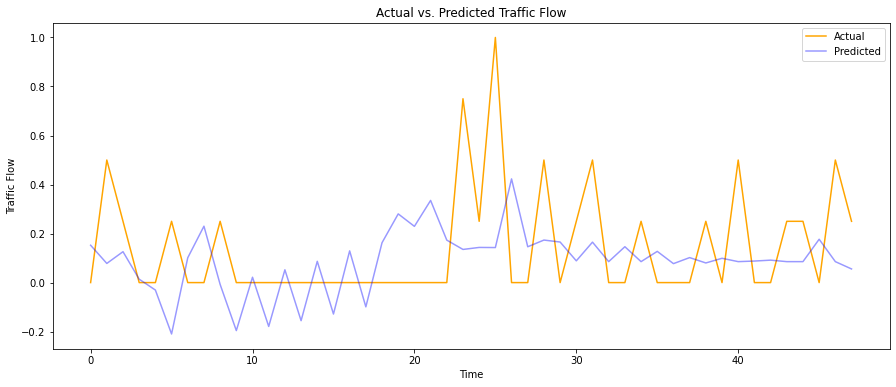

time: 375 ms (started: 2023-06-30 18:25:35 +03:00)


In [21]:
# Plot actual vs. predicted values
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual',color='orange')
plt.plot(y_pred, label='Predicted',color='blue',alpha=0.4)
plt.xlabel('Time')
plt.ylabel('Traffic Flow')
plt.title('Actual vs. Predicted Traffic Flow')
plt.legend()
plt.show()


In [ ]:
y_test

In [ ]:
y_pred